# Підготовка та Аналіз даних
## Лабораторна робота №5
## Візуалізація даних
<b>Мета роботи</b>: отримати поглиблені навички з візуалізації даних; ознайомитись з matplotlib.widgets, scipy.signal.filters, а також з Plotly, Bokeh, Altair; отримати навички зі створення інтерактивних застосунків для швидкого підбору параметрів і аналізу отриманих результатів
#### ФБ-23 Хоменко Гліб

In [45]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, CheckButtons, Button
from scipy.signal import iirfilter, filtfilt


#### Завдання 1, 2:

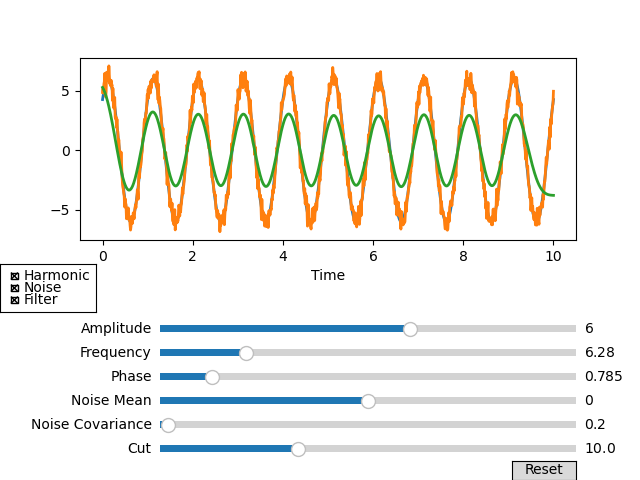

In [46]:
def harmonic(A, omega, phi, t):
    return A * np.sin(omega * t + phi)

def harmonic_with_noise(A, omega, phi, t, noise):
    harmonic = A * np.sin(omega * t + phi)
    return harmonic + noise

def filter_signal(signal, cutoff_freq, fs=1000, order=5):
    normalized_cutoff = cutoff_freq / (0.5 * fs)
    b, a = iirfilter(order, normalized_cutoff, btype='low', analog=False)
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal
t = np.linspace(0, 10, 1000)
init_amplitude = 6
init_frequency = 2*np.pi
init_phase = np.pi/4
init_mean = 0
init_covariance = 0.2
cutoff_freq = 10 
global noise
noise = np.random.normal(init_mean, np.sqrt(init_covariance), len(t))

fig, ax = plt.subplots()
line, = plt.plot(t, harmonic(init_amplitude, init_frequency, init_phase, t), lw=2, label="harmonic")
linenoise, = plt.plot(t, harmonic_with_noise(init_amplitude, init_frequency, init_phase, t, noise), lw=2, label="noise")
linefiltered, = plt.plot(t, filter_signal(harmonic_with_noise(init_amplitude, init_frequency, init_phase, t, noise), cutoff_freq), lw=2, label="filtered harmonic")
lines = [line, linenoise, linefiltered]
labels = ['Harmonic', 'Noise', 'Filter']
activated = [True, True, True]
ax.set_xlabel('Time')

plt.subplots_adjust(bottom=0.5)

axfreq = plt.axes([0.25, 0.25, 0.65, 0.03])
freq_slider = Slider(
    ax=axfreq,
    label='Frequency',
    valmin=0.1,
    valmax=30,
    valinit=init_frequency,
)

axamp = plt.axes([0.25, 0.3, 0.65, 0.03])
amp_slider = Slider(
    ax=axamp,
    label="Amplitude",
    valmin=0,
    valmax=10,
    valinit=init_amplitude,
)
axphase = plt.axes([0.25, 0.2, 0.65, 0.03])
phase_slider = Slider(
    ax=axphase,
    label="Phase",
    valmin=0,
    valmax=2*np.pi,
    valinit=init_phase,
)
axmean = plt.axes([0.25, 0.15, 0.65, 0.03])
mean_slider = Slider(
    ax=axmean,
    label="Noise Mean",
    valmin=-10,
    valmax=10,
    valinit=init_mean,
)
axcovariance = plt.axes([0.25, 0.1, 0.65, 0.03])
covariance_slider = Slider(
    ax=axcovariance,
    label="Noise Сovariance",
    valmin=0,
    valmax=10,
    valinit=init_covariance,
)
axcut = plt.axes([0.25, 0.05, 0.65, 0.03])
cut_slider = Slider(
    ax=axcut,
    label='Cut',
    valmin=0.1,
    valmax=30,
    valinit=cutoff_freq,
)
def update(val):
    line.set_ydata(harmonic(amp_slider.val, freq_slider.val, phase_slider.val, t))
    linenoise.set_ydata(harmonic_with_noise(amp_slider.val, freq_slider.val, phase_slider.val, t, noise))
    linefiltered.set_ydata(filter_signal(harmonic_with_noise(amp_slider.val, freq_slider.val, phase_slider.val, t, noise), cut_slider.val))
    fig.canvas.draw_idle()
def update_noise(val):
    global noise
    noise = np.random.normal(mean_slider.val, np.sqrt(covariance_slider.val), len(t))
    linenoise.set_ydata(harmonic_with_noise(amp_slider.val, freq_slider.val, phase_slider.val, t, noise))
    linefiltered.set_ydata(filter_signal(harmonic_with_noise(amp_slider.val, freq_slider.val, phase_slider.val, t, noise), cut_slider.val))
    fig.canvas.draw_idle()
    
freq_slider.on_changed(update)
amp_slider.on_changed(update)
phase_slider.on_changed(update)
mean_slider.on_changed(update_noise)
covariance_slider.on_changed(update_noise)
cut_slider.on_changed(update)
resetax = plt.axes([0.8, 0, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')

def reset(event):
    freq_slider.reset()
    amp_slider.reset()
    phase_slider.reset()
    covariance_slider.reset()
    mean_slider.reset()
    cut_slider.reset()
button.on_clicked(reset)

axCheckButton = plt.axes([0, 0.35, 0.15, 0.10])
chxbox = CheckButtons(axCheckButton, labels, activated)
def set_visible(label):
    index = labels.index(label)
    lines[index].set_visible(not lines[index].get_visible())
    plt.draw()

chxbox.on_clicked(set_visible)

plt.show()




#### Завдання 3:

In [43]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def harmonic(A, omega, phi, t):
    return A * np.sin(omega * t + phi)

def harmonic_with_noise(A, omega, phi, t, noise):
    harmonic = A * np.sin(omega * t + phi)
    return harmonic + noise

t = np.linspace(0, 10, 1000)
init_amplitude = 6
init_frequency = 2*np.pi
init_phase = np.pi/4
init_mean = 0
init_covariance = 0.2
global noise
noise = np.random.normal(init_mean, np.sqrt(init_covariance), len(t))

# Create traces
trace_harmonic = go.Scatter(x=t, y=harmonic(init_amplitude, init_frequency, init_phase, t), name='Harmonic')
trace_noisy = go.Scatter(x=t, y=harmonic_with_noise(init_amplitude, init_frequency, init_phase, t, noise), name='Noisy')

# Create figure layout
fig = make_subplots(rows=2, cols=1, subplot_titles=('Harmonic Signal', 'Noisy Signal'))

# Add traces to the figure
fig.add_trace(trace_harmonic, row=1, col=1)
fig.add_trace(trace_noisy, row=2, col=1)

# Define sliders with custom labels
sliders = [
    dict(
        active=0,
        steps=[{'label': 'Frequency', 'method': 'restyle', 'args': [{'y': [harmonic(init_amplitude, 2*np.pi*freq, init_phase, t), harmonic_with_noise(init_amplitude, 2*np.pi*freq, init_phase, t, noise)]}]} for freq in np.arange(0.1, 31, 0.1)],
        currentvalue={'visible': False},
        pad={'t': 50}
    ),
    dict(
        active=0,
        steps=[{'label': 'Amplitude', 'method': 'restyle', 'args': [{'y': [harmonic(amp, init_frequency, init_phase, t), harmonic_with_noise(amp, init_frequency, init_phase, t, noise)]}]} for amp in np.arange(0, 11, 0.1)],
        currentvalue={'visible': False},
        pad={'t': 0}
    ),
    dict(
        active=0,
        steps=[{'label': 'Phase', 'method': 'restyle', 'args': [{'y': [harmonic(init_amplitude, init_frequency, phase, t), harmonic_with_noise(init_amplitude, init_frequency, phase, t, noise)]}]} for phase in np.linspace(0, 2*np.pi, 100)],
        currentvalue={'visible': False},
        pad={'t': 100}
    ),
    dict(
        active=0,
        steps=[{'label': 'Noise Mean', 'method': 'restyle', 'args': [{'y': [harmonic(init_amplitude, init_frequency, init_phase, t), harmonic_with_noise(init_amplitude, init_frequency, init_phase, t, np.random.normal(mean, np.sqrt(init_covariance), len(t)))]}]} for mean in np.linspace(-10, 10, 100)],
        currentvalue={'visible': False},
        pad={'t': 150}
    ),
    dict(
        active=0,
        steps=[{'label': 'Noise Covariance', 'method': 'restyle', 'args': [{'y': [harmonic(init_amplitude, init_frequency, init_phase, t), harmonic_with_noise(init_amplitude, init_frequency, init_phase, t, np.random.normal(init_mean, np.sqrt(cov), len(t)))]}]} for cov in np.linspace(0, 10, 100)],
        currentvalue={'visible': False},
        pad={'t': 200}
    )
]

fig.update_layout(
    sliders=sliders,
    title='Harmonic with Noise',
    xaxis_title='Time',
    showlegend=True
)
fig.show()








